<a href="https://colab.research.google.com/github/MaCuur/AI_EGs/blob/main/LSTM_for_Rainfall_Forecasting_Python_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌧️ LSTM for Rainfall Forecasting - Python Example

Input shape: (970, 30, 1), Output shape: (970, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0626 - val_loss: 0.0218
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - val_loss: 0.0110
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0116 - val_loss: 0.0095
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0093 - val_loss: 0.0080
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0089 - val_loss: 0.0080
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


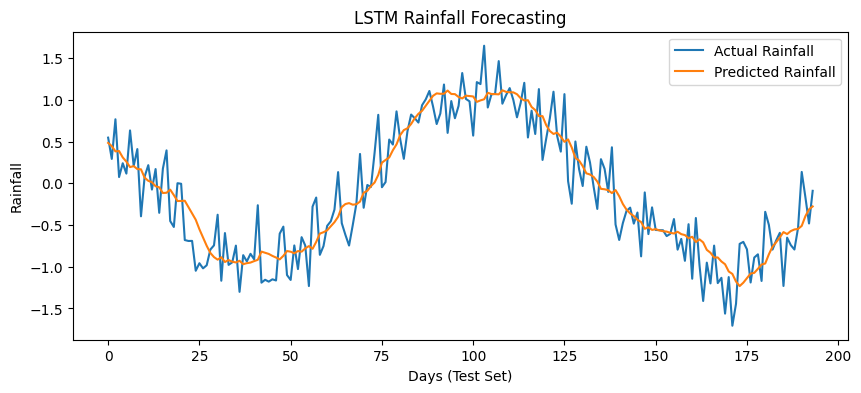

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ---------------------------
# 1. Generate Synthetic Data
# ---------------------------
np.random.seed(42)
days = 1000
rain = np.sin(np.linspace(0, 50, days)) + 0.3 * np.random.randn(days)  # synthetic rainfall
rain = rain.reshape(-1, 1)

# Normalize data (important for neural nets)
scaler = MinMaxScaler()
rain_scaled = scaler.fit_transform(rain)

# ---------------------------
# 2. Create Sequences (Sliding Window)
# ---------------------------
window_size = 30  # past 30 days -> predict next day

X, y = [], []
for i in range(len(rain_scaled) - window_size):
    X.append(rain_scaled[i:i+window_size])
    y.append(rain_scaled[i+window_size])

X = np.array(X)
y = np.array(y)

print(f"Input shape: {X.shape}, Output shape: {y.shape}")
# X shape -> (samples, time steps, features)

# ---------------------------
# 3. Split Train/Test
# ---------------------------
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ---------------------------
# 4. Build LSTM Model
# ---------------------------
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)  # Predict next rainfall value
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# ---------------------------
# 5. Train Model
# ---------------------------
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# ---------------------------
# 6. Evaluate Model
# ---------------------------
loss = model.evaluate(X_test, y_test)
print(f"Test MSE: {loss:.4f}")

# ---------------------------
# 7. Make Predictions
# ---------------------------
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# ---------------------------
# 8. Plot Results
# ---------------------------
plt.figure(figsize=(10, 4))
plt.plot(y_test_rescaled, label="Actual Rainfall")
plt.plot(predictions_rescaled, label="Predicted Rainfall")
plt.legend()
plt.title("LSTM Rainfall Forecasting")
plt.xlabel("Days (Test Set)")
plt.ylabel("Rainfall")
plt.show()